In [1]:
"""
Author: Victor Hugo Rohden Prudente
Date: April-14/2024

"""

'\nAuthor: Victor Hugo Rohden Prudente\nDate: April-14/2024\n\n'

In [2]:
# import libraries/packages
import os
import qrcode
from PIL import Image, ImageDraw, ImageFont

#pip install qrcode
#pip install PIL

In [3]:
#define a path to save the data
path_save = r"./output"

#If folder does not exist, make it. If exist, do nothing.
os.makedirs(path_save, exist_ok=True)


## QR code:
- Bussines card
    - Vcard are usefull to share the information/contact easily. Check out this [website](https://www.iana.org/assignments/vcard-elements/vcard-elements.xhtml) for more details about the fields/options.

In [4]:
# Define the contact information for the vCard
first_name = "Your Name"
last_name = "Your Surname"
email = "your@email.com"
email2 = "your@email2.com"
phone_number = "+1(111)111-1111"
url = "https://twitter.com/yourusername"

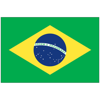

In [5]:
logo = Image.open(r"source/brazil.jpg")

# taking base width
basewidth = 100
# adjust image size
wpercent = (basewidth/float(logo.size[0]))
hsize = int((float(logo.size[1])*float(wpercent)))
logo = logo.resize((basewidth, hsize))
logo
#source(https://www.geeksforgeeks.org/how-to-generate-qr-codes-with-a-custom-logo-using-python/)

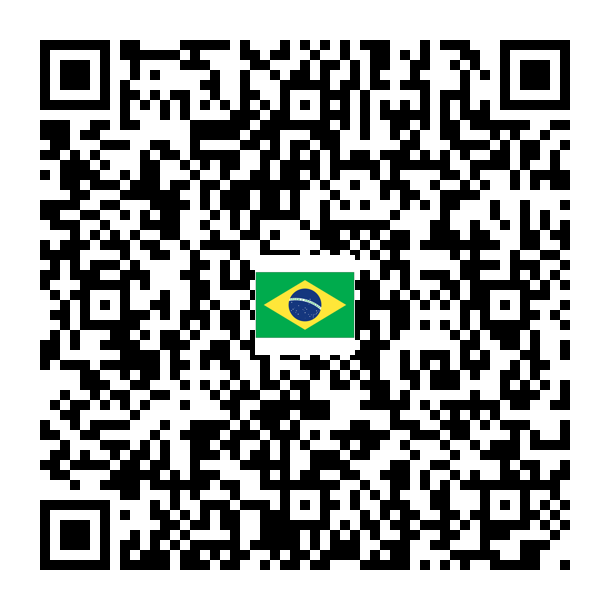

In [6]:
# Create the vCard string

vcard = f"BEGIN:VCARD\nVERSION:3.0\nN:{last_name};{first_name};;;\nFN:{first_name}\nEMAIL;TYPE=INTERNET:{email}\nEMAIL;TYPE=INTERNET:{email2}\nTEL;TYPE=CELL:{phone_number}\nURL;TYPE=X:{url}\nEND:VCARD"

# Generate the QR code
# img = qrcode.make(vcard)

# Generate QR code
qr = qrcode.QRCode(version=3, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
qr.add_data(vcard)
qr.make(fit=True)

# Convert QR code to PIL image
img = qr.make_image(fill_color="black", back_color="white")

# Converting the image to RGB mode
img = img.convert('RGB')


# set size of QR code
pos = ((img.size[0] - logo.size[0]) // 2,
       (img.size[1] - logo.size[1]) // 2)
img.paste(logo, pos)

##if you want to have a title in the QR Code, just use this part and save the figure
# # Creating a drawing object
# draw = ImageDraw.Draw(img)


# # Font style and size
# font = ImageFont.truetype("arial.ttf", 30)

# # Position to add the text (centered horizontally, top)
# text_position = (50, 5)

# # Adding the text to the image
# draw.text(text_position,  f"{first_name}_{last_name}", fill="black", font=font)

#showing the qrcode
img

In [7]:
#save the qrcode as image
img.save(os.path.join(path_save, f"vcard_{first_name}.png"))